### Install required modules and import data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, models, layers

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


### Pre-Processing

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
print("Before reshape: ", y_train[:5])
y_train = y_train.reshape(-1,)
print("After reshape: ", y_train[:5])

Before reshape:  [[6]
 [9]
 [9]
 [4]
 [1]]
After reshape:  [6 9 9 4 1]


In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
print("Before reshape: ", y_test[:5])
y_test = y_test.reshape(-1,)
print("After reshape: ", y_test[:5])

Before reshape:  [[3]
 [8]
 [8]
 [0]
 [6]]
After reshape:  [3 8 8 0 6]


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog",
           "frog","horse","ship","truck"]

In [ ]:
def show_sample_data(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

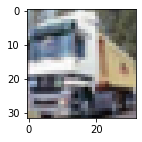

In [ ]:
show_sample_data(X_train,y_train,1)

In [ ]:
##Normalise Data

X_train_org = X_train
X_train = X_train / 255.0
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [ ]:
X_test_org = X_test
X_test = X_test / 255.0
X_test[1]

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91372549, 0.91372549, 0.91372549],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.93333333, 0.93333333, 0.93333333],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941176, 0.92941176, 0.92941176],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117647, 0.38823529, 0.34901961],
        [0.16862745, 0.2       , 0.14509804],
        [0.0745098 , 0

### MLP Model

In [ ]:
mlp = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])

mlp.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
mlp.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8095 - accuracy: 0.3590
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6190 - accuracy: 0.4279
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5389 - accuracy: 0.4569
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4785 - accuracy: 0.4804
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4306 - accuracy: 0.4962
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3887 - accuracy: 0.5132
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3513 - accuracy: 0.5265
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3150 - accuracy: 0.5368
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2828 - accuracy: 0.5489
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [ ]:
def pred_viz(model,index):
  y_pred = np.argmax(model.predict(X_test[None,index]))
  print("Expected Value: ", y_test[index])
  print("Predicted Value: ", y_pred)
  print("Expected Class: ", classes[y_test[index]])
  print("Predicted Class: ", classes[y_pred])
  plt.figure(figsize=(10,2))
  plt.imshow(X_test_org[index])

Expected Value:  2
Predicted Value:  2
Expected Class:  bird
Predicted Class:  bird


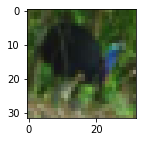

In [ ]:
pred_viz(mlp,775)

In [ ]:
from sklearn.metrics import classification_report

y_pred = [np.argmax(x) for x in mlp.predict(X_test)]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.64      0.59      1000
           1       0.62      0.69      0.66      1000
           2       0.38      0.44      0.41      1000
           3       0.42      0.28      0.34      1000
           4       0.39      0.58      0.46      1000
           5       0.50      0.34      0.41      1000
           6       0.58      0.55      0.56      1000
           7       0.64      0.51      0.57      1000
           8       0.65      0.66      0.66      1000
           9       0.58      0.55      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



## CNN Model

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 17s 6ms/step - loss: 1.4482 - accuracy: 0.4811
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0985 - accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9724 - accuracy: 0.6615
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8845 - accuracy: 0.6916
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8127 - accuracy: 0.7172
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7570 - accuracy: 0.7366
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7011 - accuracy: 0.7563
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6527 - accuracy: 0.7735
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6086 - accuracy: 0.7877
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.57

Expected Value:  5
Predicted Value:  5
Expected Class:  dog
Predicted Class:  dog


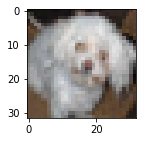

In [ ]:
pred_viz(cnn,1000)

In [ ]:
y_pred = [np.argmax(x) for x in cnn.predict(X_test)]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.80      0.82      0.81      1000
           2       0.60      0.59      0.60      1000
           3       0.55      0.40      0.46      1000
           4       0.68      0.63      0.65      1000
           5       0.51      0.72      0.60      1000
           6       0.84      0.70      0.77      1000
           7       0.71      0.81      0.76      1000
           8       0.83      0.80      0.81      1000
           9       0.84      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

